# Visualize Master Data.ipynb

## Import Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tiktoken

## Load Data

In [7]:
data = pd.read_csv('../data/master_data/master_data.csv')

## Add number of tokens for content column

In [8]:
data.shape

(4907, 6)

In [9]:
data

,title,url,content,subject,sub-subject,site
0,Análise combinatória,https://brasilescola.uol.com.br/matematica/ana...,A análise combinatória é um campo de estudo da...,matematica,analise-combinatoria.htm,Brasil Escola
1,Binômio de Newton,https://brasilescola.uol.com.br/matematica/bin...,Binômio de Newton é qualquer binômio elevado a...,matematica,binomio-de-newton.htm,Brasil Escola
2,Circunferência,https://brasilescola.uol.com.br/matematica/cir...,A circunferência é uma figura geométrica plana...,matematica,circunferencia.htm,Brasil Escola
3,Conjuntos,https://brasilescola.uol.com.br/matematica/con...,A compreensão de conjuntos é a principal base ...,matematica,conjunto.htm,Brasil Escola
4,Equação,https://brasilescola.uol.com.br/matematica/equ...,Uma equação é uma sentença matemática que poss...,matematica,equacao.htm,Brasil Escola
...,...,...,...,...,...,...
4902,Economia global atual,https://querobolsa.com.br/enem/geografia/econo...,1) Introdução\n\n2) Revolução Verde\n\n3) Bret...,geografia,economia-global-atual,Quero Bolsa
4903,Efeito estufa,https://querobolsa.com.br/enem/geografia/efeit...,1) Introdução\n\n2) O que é o efeito estufa?\n...,geografia,efeito-estufa,Quero Bolsa
4904,Elementos de um Mapa: veja quais são os princi...,https://querobolsa.com.br/enem/geografia/eleme...,1) Introdução\n\n2) Título\n\n3) Coordenadas g...,geografia,elementos-do-mapa,Quero Bolsa
4905,El Niño e La Niña,https://querobolsa.com.br/enem/geografia/el-ni...,1) Introdução\n\n2) El Niño\n\n3) La Niña\n\n4...,geografia,el-nino-e-la-nina,Quero Bolsa


In [11]:
gpt_encoding = tiktoken.encoding_for_model("gpt-4")

def count_tokens(text: str): 
    return len(gpt_encoding.encode(text))

data['n_tokens'] = data['content'].apply(count_tokens)


## Visualize Data

### Number of most common Subjects 

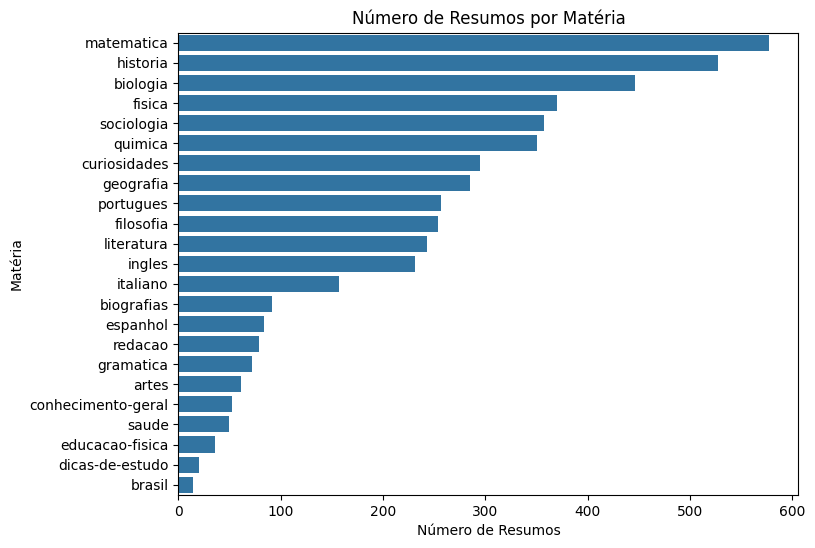

In [ ]:
# Calculate subject counts
subject_counts = data['subject'].value_counts()

# Create a categorical type with ordered subjects
ordered_subjects = subject_counts.index

# Plot with ordered subjects using countplot
plt.figure(figsize=(8, 6))  # Adjusted height for better visibility
sns.countplot(data=data, y='subject', order=ordered_subjects)  # Switched x and y
plt.xticks(rotation=0)  # No rotation needed for horizontal bars
# set title
plt.title('Número de Conteúdos Didáticos por Matéria')
plt.xlabel('Número de Conteúdos Didáticos')
plt.ylabel('Matéria')
plt.show()

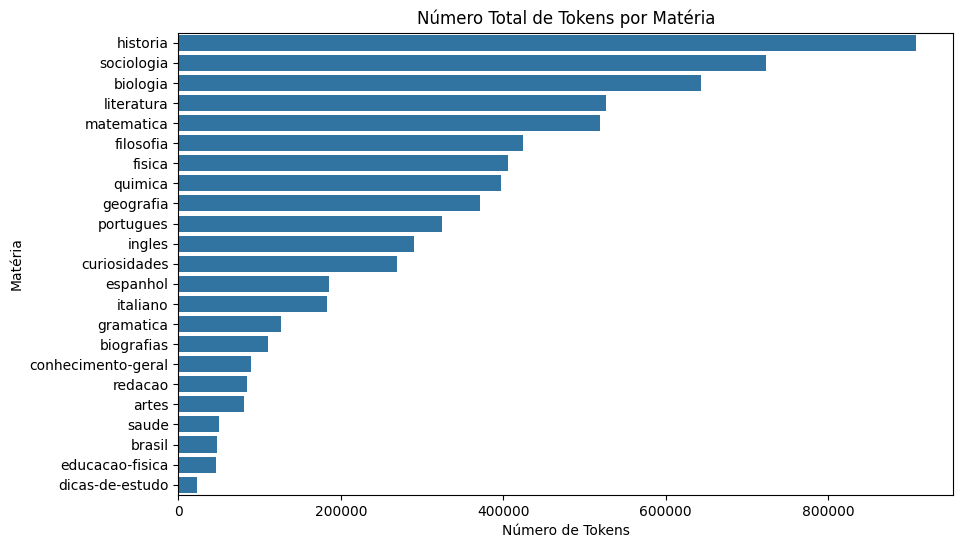

In [26]:

total_tokens = data.groupby('subject')['n_tokens'].sum().reset_index()

# Create a categorical type with ordered subjects based on total tokens
ordered_subjects = total_tokens.sort_values('n_tokens', ascending=False)['subject']

# Plot with ordered subjects using countplot
plt.figure(figsize=(10, 6))
sns.barplot(data=total_tokens, y='subject', x='n_tokens', order=ordered_subjects)  # Switched x and y
plt.xticks(rotation=0)  # No rotation needed for horizontal bars

# Set title and labels
plt.title('Número Total de Tokens por Matéria')
plt.xlabel('Número de Tokens')
plt.ylabel('Matéria')

plt.show()


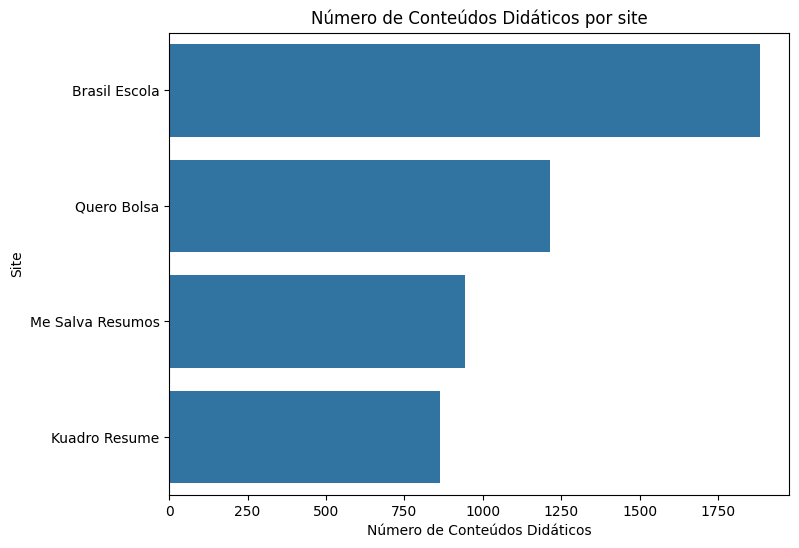

In [18]:
# Calculate subject counts
site_counts = data['site'].value_counts()

# Create a categorical type with ordered subjects
ordered_sites = site_counts.index

# Plot with ordered subjects using countplot
plt.figure(figsize=(8, 6))  # Adjusted height for better visibility
sns.countplot(data=data, y='site', order=ordered_sites)  # Switched x and y
plt.xticks()  # No rotation needed for horizontal bars
# set title
plt.title('Número de Conteúdos Didáticos por site')
plt.xlabel('Número de Conteúdos Didáticos')
plt.ylabel('Site')
plt.show()